| ![logo](udinus.png)      |**LEMBAR SOAL UJIAN <br> FAKULTAS ILMU KOMPUTER <br> UNIVERSITAS DIAN NUSWANTORO SEMARANG <br>** JL. IMAM BONJOL NO. 207 SEMARANG TELP. 024-3575915, 024-3575916 |
| :---                     |    :----:   | 


|UJIAN TENGAH SEMESTER GASAL 2022/2023|
|:---:|


|Mata Kuliah: Analitika Media Sosial | Sifat: Take Home|
| :---                     |    ----:   |
|Hari / Tanggal: **01 November 2022**       | Waktu: **10.20 - 12.00** |
|Kelompok: A12.6501                 | Dosen: **Abu Salam, M.Kom**|




# Petunjuk Pengerjaan Soal:
- Panduan pengerjaan dalam bentuk gambar ada dibawah block ini
- Sudah disediakan tiap block untuk anda dilengkapi, silakan isi ditempat tersebut, jika block cell kurang, silakan tambahkan lagi **diperbolehkan memodifikasi atau menambahkan proses dari blok yang sudah ada**
- **TUJUAN: ANALISIS TAHAP PRE PROCESSING DAN BERAPA PERFORMA DARI SKEMA YANG DIBUAT DENGAN MENGGUNAKAN TARGET `EMOSI`**

FORMAT PENGIRIMAN SOAL (PILIH SALAH SATU)
- REPOSITORIKAN FILE IPYNB KE GITHUB & KIRIM URL GITHUB KE KULINO BLOK UTS
- FORMAT PENAMAN FILE: AMS_NIM (GANTI TANDA TITIK PADA NIM MENJADI `UNDERSCORE`)


SKEMA KLASIFIKASI
===
![klasifikasi](klasifikasi.png)

SKEMA PRE-PREPROCESSING DATA
===
![preprocessing](preprocessing.png)





## *Faradila Zahrotunnisa*
## *A12.2020.06429*

# Load Library

Memanggil library yang akan digunakan

In [1]:
import pandas as pd
import time
import tweepy
import numpy as np

## Outentifikasi dan Hak Akses 

In [2]:
def twitter_config():
    """
    Fungsi utilitas untuk mengkonfigurasi konsumsi file API Twitter dengan␣
    ,!kunci yang disediakan.
    """
    # Otentikasi dan akses menggunakan kunci:
    auth = tweepy.OAuthHandler("lr5lTHMv7q3c6gOeCR8w0DFzQ", "t9LpATUUcebgxKaHm0fgxjWMqXK3kZBxeL98WHEOSolf8dFLt4")
    auth.set_access_token("1576445316596781056-RXF1mToSQtHn6O9BRxbAzeaTV3zN7N", "UpmNsnkOoCxzn0lKhMas7LV0KfeKBm0QAeobWz66ohLuM")
    # Kembalikan akses ke API:
    api = tweepy.API(auth)
    try:
        api.verify_credentials()
        print("Authentication OK")
    except:
        print("Error during authentication")
    return api

In [3]:
# buat extractor object
extractor = twitter_config()

Authentication OK


## Ambil Tweet dari Username
Username yang saya gunakan yakni @mediaindonesia

In [4]:
tweets = extractor.user_timeline(screen_name="mediaindonesia", count=100)
print("Tweets terambil: {}.\n".format(len(tweets)))

print("10 tweet teratas:\n")
for tweet in tweets[:10]:
    print(tweet.text)
    print()

Tweets terambil: 100.

10 tweet teratas:

Belasan perusahaan di wilayah Kota Tasikmalaya, Jawa Barat, melakuan pemutusan hubungan kerja (PHK) bagi pegawai.  https://t.co/0NGp6nLZpr

Latar belakang pengalaman Prabowo di dunia militer menjadi lengkap bila berpasangan dengan Erick Thohir  https://t.co/MI9SRBX8RK

9 Tips Sederhana untuk Memulai Rutininas Olahraga Lari   https://t.co/rzoCKTC99z

Sebagai informasi, Mandatory Serum Infused Brightening Body Lotion dilengkapi dengan kandungan serum infused di set… https://t.co/6mguLmErLB

RT @KementerianLHK: Sobat Hijau, Pemerintah Indonesia melalui Kementerian LHK, dan Inggris (UK) melalui the Foreign, Commonwealth and Devel…

World Justice Project (WJP), organisasi yang bergerak untuk memajukan supremasi hukum, lewat penelitian bertajuk Ru… https://t.co/2cPODuqfw4

Wakil Ketua Majelis Syuro Partai Keadilan Sejahtera Ahmad Heryawan bertemu calon presiden (capres) dari Partai NasD… https://t.co/GuuFZEDPbY

Ia menyerukan kepada para mahasiswa un

## Memasukkan ke dataframe pandas 

In [5]:
# Membuat kerangka data menggunakan sintaks berikut
dataset = pd.DataFrame(data = [tweet.text for tweet in tweets], columns = ['Tweets'])

# Tampilan kerangka data
display(dataset.head(100))

,Tweets
0,Belasan perusahaan di wilayah Kota Tasikmalaya...
1,Latar belakang pengalaman Prabowo di dunia mil...
2,9 Tips Sederhana untuk Memulai Rutininas Olahr...
3,"Sebagai informasi, Mandatory Serum Infused Bri..."
4,"RT @KementerianLHK: Sobat Hijau, Pemerintah In..."
...,...
95,"Sementara itu, kasus aktif meningkat 1.005 seh..."
96,Shodiq meyakini bahwa kekuatan anak muda sanga...
97,"Tahun ini, Indonesia secara global maupun di A..."
98,"""Jangan dahulu anti ini anti itu. Kriterianya ..."


In [6]:
dataset.to_csv('dataset_mediaindonesia.csv')

## Menentukan Sentimen pada Tweet

In [7]:
import tweepy as tw
import re
import pandas as pd
from textblob import TextBlob

In [9]:
auth = tw.OAuthHandler("lr5lTHMv7q3c6gOeCR8w0DFzQ", "t9LpATUUcebgxKaHm0fgxjWMqXK3kZBxeL98WHEOSolf8dFLt4")
auth.set_access_token("1576445316596781056-RXF1mToSQtHn6O9BRxbAzeaTV3zN7N", "UpmNsnkOoCxzn0lKhMas7LV0KfeKBm0QAeobWz66ohLuM")
api = tw.API(auth)
    
hasilsearch = api.search_tweets(q="mediaindonesia",lang="id",count=100) 

In [13]:
hasilanalisis =[]

for tweet in hasilsearch:
    tweet_properties = {}
    tweet_properties["pengguna"] = tweet.user.screen_name
    tweet_properties["Tweets"] = tweet.text
    tweet_bersih = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",tweet.text).split())
    print(tweet_bersih)
    
    analysis = TextBlob(tweet_bersih)
    try:
        analysis = analysis.translate(to="en")
    except Exception as e:
        print(e)
    
    if analysis.sentiment.polarity > 0.0:
        tweet_properties["sentimen"] = "1"
    elif analysis.sentiment.polarity == 0.0:
        tweet_properties["sentimen"] = "0"
    else:
        tweet_properties["sentimen"] = "-1"
        
    if tweet.retweet_count > 0:
        if tweet_properties not in hasilanalisis:
            hasilanalisis.append(tweet_properties)
    else:
        hasilanalisis.append(tweet_properties)

Wah cocok ne gw dukung 2024 menang di balai pustaka Amin
'list' object has no attribute 'strip'
Belasan perusahaan di wilayah Kota Tasikmalaya Jawa Barat melakuan pemutusan hubungan kerja PHK bagi pegawai
'list' object has no attribute 'strip'
Latar belakang pengalaman Prabowo di dunia militer menjadi lengkap bila berpasangan dengan Erick Thohir
'list' object has no attribute 'strip'
9 Tips Sederhana untuk Memulai Rutininas Olahraga Lari
'list' object has no attribute 'strip'
Sebagai informasi Mandatory Serum Infused Brightening Body Lotion dilengkapi dengan kandungan serum infused di set
'list' object has no attribute 'strip'
RT Sobat Hijau Pemerintah Indonesia melalui Kementerian LHK dan Inggris UK melalui the Foreign Commonwealth and Devel
'list' object has no attribute 'strip'
RT Video musik The Astronaut menunjukkan pesona unik Jin sebagai artis solo saat ia mengungkapkan cintanya kepada ARMY
'list' object has no attribute 'strip'
World Justice Project WJP organisasi yang bergerak

'list' object has no attribute 'strip'
Namun utk Capres yg di didukung oleh NASDEM saat ini bakal merusak Citra NASDEM pada Pemilu 2024
'list' object has no attribute 'strip'
Kedutaan Besar RI di Beijing telah mengeluarkan visa bagi 221 wartawan dari berbagai media yang berafiliasi dengan
'list' object has no attribute 'strip'
RT Dua Bulan Menuju 2023 Anggaran Belanja Negara Masih Tersisa Rp1 200 Triliun Hingga akhir September alokasi belanja n
'list' object has no attribute 'strip'
Konser musik Berdendang Bergoyang di Istora Senayan Sabtu 29 10 malam dihentikan oleh polisi
'list' object has no attribute 'strip'
Puncak Milad Ke 45 BKPRMI Prabowo Subianto Sumbang 25 Mobil Pemelihara Masjid
'list' object has no attribute 'strip'
Polri TNI
'list' object has no attribute 'strip'
Ya untuk Perjuangan karena bpk tahu siapa yg seharusnya dicalonkan bukan karena anak atau cucu tokoh
'list' object has no attribute 'strip'
Oalahh pantesan hehe
'list' object has no attribute 'strip'
Pada malam Hal

In [14]:
df = pd.DataFrame(hasilanalisis)
df

,pengguna,Tweets,sentimen
0,OtterAng,"@mediaindonesia Wah cocok ne, gw dukung 2024 m...",0
1,mediaindonesia,Belasan perusahaan di wilayah Kota Tasikmalaya...,0
2,mediaindonesia,Latar belakang pengalaman Prabowo di dunia mil...,0
3,mediaindonesia,9 Tips Sederhana untuk Memulai Rutininas Olahr...,0
4,mediaindonesia,"Sebagai informasi, Mandatory Serum Infused Bri...",0
...,...,...,...
91,mediaindonesia,MEMBANGKITKAN kembali gairah memproduksi minia...,0
92,auliafikrah10,RT @mediaindonesia: Berbagai macam pengalaman ...,0
93,mediaindonesia,"Menurut Saiful, Syahrial sebagai litbang juga ...",0
94,mediaindonesia,"Diketahui, PSSI memutuskan untuk mempercepat p...",0


In [15]:
df.to_csv('Dataset_Sentimen.csv')

# Preprocessing Tahap 00
## Yang dipakai adalah Label `Sentimen` 

In [16]:
df.head()

,pengguna,Tweets,sentimen
0,OtterAng,"@mediaindonesia Wah cocok ne, gw dukung 2024 m...",0
1,mediaindonesia,Belasan perusahaan di wilayah Kota Tasikmalaya...,0
2,mediaindonesia,Latar belakang pengalaman Prabowo di dunia mil...,0
3,mediaindonesia,9 Tips Sederhana untuk Memulai Rutininas Olahr...,0
4,mediaindonesia,"Sebagai informasi, Mandatory Serum Infused Bri...",0


In [17]:
df.head(100)

,pengguna,Tweets,sentimen
0,OtterAng,"@mediaindonesia Wah cocok ne, gw dukung 2024 m...",0
1,mediaindonesia,Belasan perusahaan di wilayah Kota Tasikmalaya...,0
2,mediaindonesia,Latar belakang pengalaman Prabowo di dunia mil...,0
3,mediaindonesia,9 Tips Sederhana untuk Memulai Rutininas Olahr...,0
4,mediaindonesia,"Sebagai informasi, Mandatory Serum Infused Bri...",0
...,...,...,...
91,mediaindonesia,MEMBANGKITKAN kembali gairah memproduksi minia...,0
92,auliafikrah10,RT @mediaindonesia: Berbagai macam pengalaman ...,0
93,mediaindonesia,"Menurut Saiful, Syahrial sebagai litbang juga ...",0
94,mediaindonesia,"Diketahui, PSSI memutuskan untuk mempercepat p...",0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   pengguna  96 non-null     object
 1   Tweets    96 non-null     object
 2   sentimen  96 non-null     object
dtypes: object(3)
memory usage: 2.4+ KB


## Load dataset

In [19]:
df = pd.read_csv('Dataset_Sentimen.csv')
df.head(10)

,Unnamed: 0,pengguna,Tweets,sentimen
0,0,OtterAng,"@mediaindonesia Wah cocok ne, gw dukung 2024 m...",0
1,1,mediaindonesia,Belasan perusahaan di wilayah Kota Tasikmalaya...,0
2,2,mediaindonesia,Latar belakang pengalaman Prabowo di dunia mil...,0
3,3,mediaindonesia,9 Tips Sederhana untuk Memulai Rutininas Olahr...,0
4,4,mediaindonesia,"Sebagai informasi, Mandatory Serum Infused Bri...",0
5,5,mediaindonesia,"RT @KementerianLHK: Sobat Hijau, Pemerintah In...",-1
6,6,JinkimJo,RT @mediaindonesia: Video musik The Astronaut ...,0
7,7,mediaindonesia,"World Justice Project (WJP), organisasi yang b...",0
8,8,cocoblogger,"Redam Masalah Air, Srikandi Ganjar Bangun Sumu...",0
9,9,kokokdirgantoro,RT @mediaindonesia: Ia menyerukan kepada para ...,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  96 non-null     int64 
 1   pengguna    96 non-null     object
 2   Tweets      96 non-null     object
 3   sentimen    96 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 3.1+ KB


# Preprocessing Tahap 01

## Proses Penataan Data
bisa menggunakan ekphrasis

In [21]:
from ekphrasis.classes.preprocessor import TextPreProcessor
from ekphrasis.classes.tokenizer import SocialTokenizer
from ekphrasis.dicts.emoticons import emoticons

text_processor = TextPreProcessor(
    # terms that will be normalized
    normalize=['email', 'percent', 'money', 'phone', 'user',
        'time', 'date', 'number'],
    # terms that will be annotated
    #annotate={"hashtag", "allcaps", "elongated", "repeated",'emphasis', 'censored'},
    annotate={"hashtag"},
    fix_html=True,  # fix HTML tokens
    
    # corpus from which the word statistics are going to be used 
    # for word segmentation 
    segmenter="twitter", 
    
    # corpus from which the word statistics are going to be used 
    # for spell correction
    corrector="twitter", 
    
    unpack_hashtags=True,  # perform word segmentation on hashtags
    unpack_contractions=True,  # Unpack contractions (can't -> can not)
    spell_correct_elong=False,  # spell correction for elongated words
    
    # select a tokenizer. You can use SocialTokenizer, or pass your own
    # the tokenizer, should take as input a string and return a list of tokens
    tokenizer=SocialTokenizer(lowercase=True).tokenize,
    
    # list of dictionaries, for replacing tokens extracted from the text,
    # with other expressions. You can pass more than one dictionaries.
    dicts=[emoticons]
)

/Users/faradilazahrotunnisa/opt/anaconda3/lib/python3.9/site-packages/ekphrasis/classes/tokenizer.py:225: FutureWarning: Possible nested set at position 2190
  self.tok = re.compile(r"({})".format("|".join(pipeline)))


Reading twitter - 1grams ...
Reading twitter - 2grams ...
Reading twitter - 1grams ...


/Users/faradilazahrotunnisa/opt/anaconda3/lib/python3.9/site-packages/ekphrasis/classes/exmanager.py:14: FutureWarning: Possible nested set at position 42
  regexes = {k.lower(): re.compile(self.expressions[k]) for k, v in


## Pembersihan element yang tidak digunakan


In [22]:
def bersih_data(text):
    return " ".join(text_processor.pre_process_doc(text))

def non_ascii(text):
    return text.encode('ascii', 'replace').decode('ascii')

def remove_space_alzami(text):
    return " ".join(text.split())

def remove_emoji_alzami(text):
    return ' '.join(re.sub("([x#][A-Za-z0-9]+)"," ", text).split())

def remove_tab(text):
    return text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")

def remove_tab2(text):
    return re.sub('\s+',' ',text)

def remove_rt(text):
    return text.replace('RT'," ")

def remove_mention(text):
    return ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())

def remove_incomplete_url(text):
    return text.replace("http://", " ").replace("https://", " ")

def remove_single_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

def change_stripe(text):
    return text.replace('-'," ")

def lower(text):
    return text.lower()

def remove_punctuation(text):
    remove = string.punctuation
    remove = remove.replace("_", "") # don't remove hyphens
    pattern = r"[{}]".format(remove) # create the pattern
    return re.sub(pattern, "", text) 

In [23]:
import string

### Panggil dan jalankan fungsi yang di deskripsikan diatas

In [24]:
final_string = []
for text in df['Tweets'].values:
    EachReviewText = ""
    proc = bersih_data(text)
    proc = remove_rt(proc) 
    proc = lower(proc)
    proc = change_stripe(proc)
    proc = remove_tab(proc)
    proc = remove_tab2(proc)
    proc = non_ascii(proc)
    proc = remove_incomplete_url(proc)
    proc = remove_single_char(proc)
    proc = remove_punctuation(proc)
    proc = remove_space_alzami(proc)
    EachReviewText = proc
    final_string.append(EachReviewText)

In [25]:
df["step01"] = final_string
df

,Unnamed: 0,pengguna,Tweets,sentimen,step01
0,0,OtterAng,"@mediaindonesia Wah cocok ne, gw dukung 2024 m...",0,user wah cocok ne gw dukung number menang di b...
1,1,mediaindonesia,Belasan perusahaan di wilayah Kota Tasikmalaya...,0,belasan perusahaan di wilayah kota tasikmalaya...
2,2,mediaindonesia,Latar belakang pengalaman Prabowo di dunia mil...,0,latar belakang pengalaman prabowo di dunia mil...
3,3,mediaindonesia,9 Tips Sederhana untuk Memulai Rutininas Olahr...,0,number tips sederhana untuk memulai rutininas ...
4,4,mediaindonesia,"Sebagai informasi, Mandatory Serum Infused Bri...",0,sebagai informasi mandatory serum infused brig...
...,...,...,...,...,...
91,91,mediaindonesia,MEMBANGKITKAN kembali gairah memproduksi minia...,0,membangkitkan kembali gairah memproduksi minia...
92,92,auliafikrah10,RT @mediaindonesia: Berbagai macam pengalaman ...,0,rt user berbagai macam pengalaman selama menga...
93,93,mediaindonesia,"Menurut Saiful, Syahrial sebagai litbang juga ...",0,menurut saiful syahrial sebagai litbang juga t...
94,94,mediaindonesia,"Diketahui, PSSI memutuskan untuk mempercepat p...",0,diketahui pssi memutuskan untuk mempercepat pe...


#### Sampai tahap ini didaparkan kolom baru untuk Kolom `step01`

In [26]:
df.head(10)

,Unnamed: 0,pengguna,Tweets,sentimen,step01
0,0,OtterAng,"@mediaindonesia Wah cocok ne, gw dukung 2024 m...",0,user wah cocok ne gw dukung number menang di b...
1,1,mediaindonesia,Belasan perusahaan di wilayah Kota Tasikmalaya...,0,belasan perusahaan di wilayah kota tasikmalaya...
2,2,mediaindonesia,Latar belakang pengalaman Prabowo di dunia mil...,0,latar belakang pengalaman prabowo di dunia mil...
3,3,mediaindonesia,9 Tips Sederhana untuk Memulai Rutininas Olahr...,0,number tips sederhana untuk memulai rutininas ...
4,4,mediaindonesia,"Sebagai informasi, Mandatory Serum Infused Bri...",0,sebagai informasi mandatory serum infused brig...
5,5,mediaindonesia,"RT @KementerianLHK: Sobat Hijau, Pemerintah In...",-1,rt user sobat hijau pemerintah indonesia melal...
6,6,JinkimJo,RT @mediaindonesia: Video musik The Astronaut ...,0,rt user video musik the astronaut menunjukkan ...
7,7,mediaindonesia,"World Justice Project (WJP), organisasi yang b...",0,world justice project wjp organisasi yang berg...
8,8,cocoblogger,"Redam Masalah Air, Srikandi Ganjar Bangun Sumu...",0,redam masalah air srikandi ganjar bangun sumur...
9,9,kokokdirgantoro,RT @mediaindonesia: Ia menyerukan kepada para ...,0,rt user ia menyerukan kepada para mahasiswa un...


## Hapus data kosong

In [27]:
df_hapus = df[~df['step01'].str.contains(" ")]

In [28]:
df_hapus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  0 non-null      int64 
 1   pengguna    0 non-null      object
 2   Tweets      0 non-null      object
 3   sentimen    0 non-null      int64 
 4   step01      0 non-null      object
dtypes: int64(2), object(3)
memory usage: 0.0+ bytes


In [29]:
df_hapus.head()

,Unnamed: 0,pengguna,Tweets,sentimen,step01


In [30]:
df_new = df[~df.isin(df_hapus)].dropna()

In [31]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  96 non-null     int64 
 1   pengguna    96 non-null     object
 2   Tweets      96 non-null     object
 3   sentimen    96 non-null     int64 
 4   step01      96 non-null     object
dtypes: int64(2), object(3)
memory usage: 3.9+ KB


In [32]:
df_new

,Unnamed: 0,pengguna,Tweets,sentimen,step01
0,0,OtterAng,"@mediaindonesia Wah cocok ne, gw dukung 2024 m...",0,user wah cocok ne gw dukung number menang di b...
1,1,mediaindonesia,Belasan perusahaan di wilayah Kota Tasikmalaya...,0,belasan perusahaan di wilayah kota tasikmalaya...
2,2,mediaindonesia,Latar belakang pengalaman Prabowo di dunia mil...,0,latar belakang pengalaman prabowo di dunia mil...
3,3,mediaindonesia,9 Tips Sederhana untuk Memulai Rutininas Olahr...,0,number tips sederhana untuk memulai rutininas ...
4,4,mediaindonesia,"Sebagai informasi, Mandatory Serum Infused Bri...",0,sebagai informasi mandatory serum infused brig...
...,...,...,...,...,...
91,91,mediaindonesia,MEMBANGKITKAN kembali gairah memproduksi minia...,0,membangkitkan kembali gairah memproduksi minia...
92,92,auliafikrah10,RT @mediaindonesia: Berbagai macam pengalaman ...,0,rt user berbagai macam pengalaman selama menga...
93,93,mediaindonesia,"Menurut Saiful, Syahrial sebagai litbang juga ...",0,menurut saiful syahrial sebagai litbang juga t...
94,94,mediaindonesia,"Diketahui, PSSI memutuskan untuk mempercepat p...",0,diketahui pssi memutuskan untuk mempercepat pe...


## Pembersihan data dengan konsep rubah kata `SLANG` menjadi kata `BAKU`

### Menggunakan NLTK

In [33]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize 

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/faradilazahrotunnisa/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [34]:
def word_tokenize_wrapper(text):
  return word_tokenize(text)

In [35]:
df_new['tokens'] = df['step01'].apply(word_tokenize_wrapper)

#### Sampai tahap ini didapatkan kolom baru untuk Kolom `tokens`

In [36]:
df_new.head(10)

,Unnamed: 0,pengguna,Tweets,sentimen,step01,tokens
0,0,OtterAng,"@mediaindonesia Wah cocok ne, gw dukung 2024 m...",0,user wah cocok ne gw dukung number menang di b...,"[user, wah, cocok, ne, gw, dukung, number, men..."
1,1,mediaindonesia,Belasan perusahaan di wilayah Kota Tasikmalaya...,0,belasan perusahaan di wilayah kota tasikmalaya...,"[belasan, perusahaan, di, wilayah, kota, tasik..."
2,2,mediaindonesia,Latar belakang pengalaman Prabowo di dunia mil...,0,latar belakang pengalaman prabowo di dunia mil...,"[latar, belakang, pengalaman, prabowo, di, dun..."
3,3,mediaindonesia,9 Tips Sederhana untuk Memulai Rutininas Olahr...,0,number tips sederhana untuk memulai rutininas ...,"[number, tips, sederhana, untuk, memulai, ruti..."
4,4,mediaindonesia,"Sebagai informasi, Mandatory Serum Infused Bri...",0,sebagai informasi mandatory serum infused brig...,"[sebagai, informasi, mandatory, serum, infused..."
5,5,mediaindonesia,"RT @KementerianLHK: Sobat Hijau, Pemerintah In...",-1,rt user sobat hijau pemerintah indonesia melal...,"[rt, user, sobat, hijau, pemerintah, indonesia..."
6,6,JinkimJo,RT @mediaindonesia: Video musik The Astronaut ...,0,rt user video musik the astronaut menunjukkan ...,"[rt, user, video, musik, the, astronaut, menun..."
7,7,mediaindonesia,"World Justice Project (WJP), organisasi yang b...",0,world justice project wjp organisasi yang berg...,"[world, justice, project, wjp, organisasi, yan..."
8,8,cocoblogger,"Redam Masalah Air, Srikandi Ganjar Bangun Sumu...",0,redam masalah air srikandi ganjar bangun sumur...,"[redam, masalah, air, srikandi, ganjar, bangun..."
9,9,kokokdirgantoro,RT @mediaindonesia: Ia menyerukan kepada para ...,0,rt user ia menyerukan kepada para mahasiswa un...,"[rt, user, ia, menyerukan, kepada, para, mahas..."


In [37]:
normalized_word = pd.read_csv('kamus_clean.csv', sep=",")

In [38]:
normalized_word_dict = {}

for index, row in normalized_word.iterrows():
    if row[0] not in normalized_word_dict:
        normalized_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalized_word_dict[term] if term in normalized_word_dict else term for term in document]

In [39]:
df_new['final_tokens'] = df_new['tokens'].apply(normalized_term)

In [40]:
i=0
final_string_tokens = []
for text in df_new['final_tokens'].values:
    EachReviewText = ""
    EachReviewText = ' '.join(text)
    final_string_tokens.append(EachReviewText)

In [41]:
df_new["step02"] = final_string_tokens

#### Sampai tahap ini didapatkan kolom baru untuk Kolom `final_token` `dan step02`

In [42]:
df_new.head(10)

,Unnamed: 0,pengguna,Tweets,sentimen,step01,tokens,final_tokens,step02
0,0,OtterAng,"@mediaindonesia Wah cocok ne, gw dukung 2024 m...",0,user wah cocok ne gw dukung number menang di b...,"[user, wah, cocok, ne, gw, dukung, number, men...","[user, wah, cocok, ne, gw, dukung, number, men...",user wah cocok ne gw dukung number menang di b...
1,1,mediaindonesia,Belasan perusahaan di wilayah Kota Tasikmalaya...,0,belasan perusahaan di wilayah kota tasikmalaya...,"[belasan, perusahaan, di, wilayah, kota, tasik...","[belasan, perusahaan, di, wilayah, kota, tasik...",belasan perusahaan di wilayah kota tasikmalaya...
2,2,mediaindonesia,Latar belakang pengalaman Prabowo di dunia mil...,0,latar belakang pengalaman prabowo di dunia mil...,"[latar, belakang, pengalaman, prabowo, di, dun...","[latar, belakang, pengalaman, prabowo, di, dun...",latar belakang pengalaman prabowo di dunia mil...
3,3,mediaindonesia,9 Tips Sederhana untuk Memulai Rutininas Olahr...,0,number tips sederhana untuk memulai rutininas ...,"[number, tips, sederhana, untuk, memulai, ruti...","[number, tips, sederhana, untuk, memulai, ruti...",number tips sederhana untuk memulai rutininas ...
4,4,mediaindonesia,"Sebagai informasi, Mandatory Serum Infused Bri...",0,sebagai informasi mandatory serum infused brig...,"[sebagai, informasi, mandatory, serum, infused...","[sebagai, informasi, mandatory, serum, infused...",sebagai informasi mandatory serum infused brig...
5,5,mediaindonesia,"RT @KementerianLHK: Sobat Hijau, Pemerintah In...",-1,rt user sobat hijau pemerintah indonesia melal...,"[rt, user, sobat, hijau, pemerintah, indonesia...","[rt, user, sobat, hijau, pemerintah, indonesia...",rt user sobat hijau pemerintah indonesia melal...
6,6,JinkimJo,RT @mediaindonesia: Video musik The Astronaut ...,0,rt user video musik the astronaut menunjukkan ...,"[rt, user, video, musik, the, astronaut, menun...","[rt, user, video, musik, the, astronaut, menun...",rt user video musik the astronaut menunjukkan ...
7,7,mediaindonesia,"World Justice Project (WJP), organisasi yang b...",0,world justice project wjp organisasi yang berg...,"[world, justice, project, wjp, organisasi, yan...","[world, justice, project, wjp, organisasi, yan...",world justice project wjp organisasi yang berg...
8,8,cocoblogger,"Redam Masalah Air, Srikandi Ganjar Bangun Sumu...",0,redam masalah air srikandi ganjar bangun sumur...,"[redam, masalah, air, srikandi, ganjar, bangun...","[redam, masalah, air, srikandi, ganjar, bangun...",redam masalah air srikandi ganjar bangun sumur...
9,9,kokokdirgantoro,RT @mediaindonesia: Ia menyerukan kepada para ...,0,rt user ia menyerukan kepada para mahasiswa un...,"[rt, user, ia, menyerukan, kepada, para, mahas...","[rt, user, ia, menyerukan, kepada, para, mahas...",rt user ia menyerukan kepada para mahasiswa un...


## simpan file terlebih dahulu

In [43]:
df_new.to_csv('clean_dataset_uts_part01.csv',sep=";")

# Stemming menggunakan Sastrawi

## load dataset

In [44]:
import pandas as pd

In [45]:
dataset = pd.read_csv('clean_dataset_uts_part01.csv', sep=';')

In [46]:
dataset.head()

,Unnamed: 0.1,Unnamed: 0,pengguna,Tweets,sentimen,step01,tokens,final_tokens,step02
0,0,0,OtterAng,"@mediaindonesia Wah cocok ne, gw dukung 2024 m...",0,user wah cocok ne gw dukung number menang di b...,"['user', 'wah', 'cocok', 'ne', 'gw', 'dukung',...","['user', 'wah', 'cocok', 'ne', 'gw', 'dukung',...",user wah cocok ne gw dukung number menang di b...
1,1,1,mediaindonesia,Belasan perusahaan di wilayah Kota Tasikmalaya...,0,belasan perusahaan di wilayah kota tasikmalaya...,"['belasan', 'perusahaan', 'di', 'wilayah', 'ko...","['belasan', 'perusahaan', 'di', 'wilayah', 'ko...",belasan perusahaan di wilayah kota tasikmalaya...
2,2,2,mediaindonesia,Latar belakang pengalaman Prabowo di dunia mil...,0,latar belakang pengalaman prabowo di dunia mil...,"['latar', 'belakang', 'pengalaman', 'prabowo',...","['latar', 'belakang', 'pengalaman', 'prabowo',...",latar belakang pengalaman prabowo di dunia mil...
3,3,3,mediaindonesia,9 Tips Sederhana untuk Memulai Rutininas Olahr...,0,number tips sederhana untuk memulai rutininas ...,"['number', 'tips', 'sederhana', 'untuk', 'memu...","['number', 'tips', 'sederhana', 'untuk', 'memu...",number tips sederhana untuk memulai rutininas ...
4,4,4,mediaindonesia,"Sebagai informasi, Mandatory Serum Infused Bri...",0,sebagai informasi mandatory serum infused brig...,"['sebagai', 'informasi', 'mandatory', 'serum',...","['sebagai', 'informasi', 'mandatory', 'serum',...",sebagai informasi mandatory serum infused brig...


### Load sastrawi sebagai stemmer

In [47]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

## Hapus stopwords

In [48]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
 
factory = StopWordRemoverFactory()

more_stopword = ['sih', 'nya','rt','loh','lah', 'dd', 'mah', 'nye', 'eh', 'ehh', 'ah', 'yang','yg']
 
# Tambahkan Stopword Baru
data = factory.get_stop_words()+more_stopword

stopwords_sastrawi = factory.create_stop_word_remover()

dictionary = ArrayDictionary(data)
str_stopwords = StopWordRemover(dictionary)

In [49]:
dataset['step02'] = dataset['step02'].apply(str)

In [50]:
df_new.head()

,Unnamed: 0,pengguna,Tweets,sentimen,step01,tokens,final_tokens,step02
0,0,OtterAng,"@mediaindonesia Wah cocok ne, gw dukung 2024 m...",0,user wah cocok ne gw dukung number menang di b...,"[user, wah, cocok, ne, gw, dukung, number, men...","[user, wah, cocok, ne, gw, dukung, number, men...",user wah cocok ne gw dukung number menang di b...
1,1,mediaindonesia,Belasan perusahaan di wilayah Kota Tasikmalaya...,0,belasan perusahaan di wilayah kota tasikmalaya...,"[belasan, perusahaan, di, wilayah, kota, tasik...","[belasan, perusahaan, di, wilayah, kota, tasik...",belasan perusahaan di wilayah kota tasikmalaya...
2,2,mediaindonesia,Latar belakang pengalaman Prabowo di dunia mil...,0,latar belakang pengalaman prabowo di dunia mil...,"[latar, belakang, pengalaman, prabowo, di, dun...","[latar, belakang, pengalaman, prabowo, di, dun...",latar belakang pengalaman prabowo di dunia mil...
3,3,mediaindonesia,9 Tips Sederhana untuk Memulai Rutininas Olahr...,0,number tips sederhana untuk memulai rutininas ...,"[number, tips, sederhana, untuk, memulai, ruti...","[number, tips, sederhana, untuk, memulai, ruti...",number tips sederhana untuk memulai rutininas ...
4,4,mediaindonesia,"Sebagai informasi, Mandatory Serum Infused Bri...",0,sebagai informasi mandatory serum infused brig...,"[sebagai, informasi, mandatory, serum, infused...","[sebagai, informasi, mandatory, serum, infused...",sebagai informasi mandatory serum infused brig...


In [51]:
i=0
final_string = []
s = ""
for sentence in df_new["step02"].values:
    filteredSentence = []
    EachReviewText = ""
    st = stopwords_sastrawi.remove(sentence)
    s = (stemmer.stem(st))
    filteredSentence.append(s)
    
    EachReviewText = ' '.join(filteredSentence)
    final_string.append(EachReviewText)

In [52]:
df_new.loc[:, ('ProcessedText')] = final_string

In [53]:
df_new.head()

,Unnamed: 0,pengguna,Tweets,sentimen,step01,tokens,final_tokens,step02,ProcessedText
0,0,OtterAng,"@mediaindonesia Wah cocok ne, gw dukung 2024 m...",0,user wah cocok ne gw dukung number menang di b...,"[user, wah, cocok, ne, gw, dukung, number, men...","[user, wah, cocok, ne, gw, dukung, number, men...",user wah cocok ne gw dukung number menang di b...,user wah cocok ne gw dukung number menang bala...
1,1,mediaindonesia,Belasan perusahaan di wilayah Kota Tasikmalaya...,0,belasan perusahaan di wilayah kota tasikmalaya...,"[belasan, perusahaan, di, wilayah, kota, tasik...","[belasan, perusahaan, di, wilayah, kota, tasik...",belasan perusahaan di wilayah kota tasikmalaya...,bas usaha wilayah kota tasikmalaya jawa barat ...
2,2,mediaindonesia,Latar belakang pengalaman Prabowo di dunia mil...,0,latar belakang pengalaman prabowo di dunia mil...,"[latar, belakang, pengalaman, prabowo, di, dun...","[latar, belakang, pengalaman, prabowo, di, dun...",latar belakang pengalaman prabowo di dunia mil...,latar belakang alam prabowo dunia militer jadi...
3,3,mediaindonesia,9 Tips Sederhana untuk Memulai Rutininas Olahr...,0,number tips sederhana untuk memulai rutininas ...,"[number, tips, sederhana, untuk, memulai, ruti...","[number, tips, sederhana, untuk, memulai, ruti...",number tips sederhana untuk memulai rutininas ...,number tips sederhana mulai rutininas olahraga...
4,4,mediaindonesia,"Sebagai informasi, Mandatory Serum Infused Bri...",0,sebagai informasi mandatory serum infused brig...,"[sebagai, informasi, mandatory, serum, infused...","[sebagai, informasi, mandatory, serum, infused...",sebagai informasi mandatory serum infused brig...,informasi mandatory serum infused brightening ...


## simpan kembali untuk jaga-jaga

In [54]:
df_new.to_csv('clean_dataset_uts_part02.csv',sep=";")

# Penutup bagian preprocessing data

disini data sudah bersih, kita akan masuk ke tahap machine learning

# Mulai Modelling

## bagi menjadi feature dan label

### load dataset

In [55]:
import pandas as pd
import numpy as np

In [56]:
dataset = pd.read_csv('clean_dataset_uts_part02.csv',sep=';')

In [57]:
dataset.shape

(96, 10)

In [58]:
dataset.head(10)

,Unnamed: 0.1,Unnamed: 0,pengguna,Tweets,sentimen,step01,tokens,final_tokens,step02,ProcessedText
0,0,0,OtterAng,"@mediaindonesia Wah cocok ne, gw dukung 2024 m...",0,user wah cocok ne gw dukung number menang di b...,"['user', 'wah', 'cocok', 'ne', 'gw', 'dukung',...","['user', 'wah', 'cocok', 'ne', 'gw', 'dukung',...",user wah cocok ne gw dukung number menang di b...,user wah cocok ne gw dukung number menang bala...
1,1,1,mediaindonesia,Belasan perusahaan di wilayah Kota Tasikmalaya...,0,belasan perusahaan di wilayah kota tasikmalaya...,"['belasan', 'perusahaan', 'di', 'wilayah', 'ko...","['belasan', 'perusahaan', 'di', 'wilayah', 'ko...",belasan perusahaan di wilayah kota tasikmalaya...,bas usaha wilayah kota tasikmalaya jawa barat ...
2,2,2,mediaindonesia,Latar belakang pengalaman Prabowo di dunia mil...,0,latar belakang pengalaman prabowo di dunia mil...,"['latar', 'belakang', 'pengalaman', 'prabowo',...","['latar', 'belakang', 'pengalaman', 'prabowo',...",latar belakang pengalaman prabowo di dunia mil...,latar belakang alam prabowo dunia militer jadi...
3,3,3,mediaindonesia,9 Tips Sederhana untuk Memulai Rutininas Olahr...,0,number tips sederhana untuk memulai rutininas ...,"['number', 'tips', 'sederhana', 'untuk', 'memu...","['number', 'tips', 'sederhana', 'untuk', 'memu...",number tips sederhana untuk memulai rutininas ...,number tips sederhana mulai rutininas olahraga...
4,4,4,mediaindonesia,"Sebagai informasi, Mandatory Serum Infused Bri...",0,sebagai informasi mandatory serum infused brig...,"['sebagai', 'informasi', 'mandatory', 'serum',...","['sebagai', 'informasi', 'mandatory', 'serum',...",sebagai informasi mandatory serum infused brig...,informasi mandatory serum infused brightening ...
5,5,5,mediaindonesia,"RT @KementerianLHK: Sobat Hijau, Pemerintah In...",-1,rt user sobat hijau pemerintah indonesia melal...,"['rt', 'user', 'sobat', 'hijau', 'pemerintah',...","['rt', 'user', 'sobat', 'hijau', 'pemerintah',...",rt user sobat hijau pemerintah indonesia melal...,rt user sobat hijau perintah indonesia lalu me...
6,6,6,JinkimJo,RT @mediaindonesia: Video musik The Astronaut ...,0,rt user video musik the astronaut menunjukkan ...,"['rt', 'user', 'video', 'musik', 'the', 'astro...","['rt', 'user', 'video', 'musik', 'the', 'astro...",rt user video musik the astronaut menunjukkan ...,rt user video musik the astronaut tunjuk peson...
7,7,7,mediaindonesia,"World Justice Project (WJP), organisasi yang b...",0,world justice project wjp organisasi yang berg...,"['world', 'justice', 'project', 'wjp', 'organi...","['world', 'justice', 'project', 'wjp', 'organi...",world justice project wjp organisasi yang berg...,world justice project wjp organisasi gerak maj...
8,8,8,cocoblogger,"Redam Masalah Air, Srikandi Ganjar Bangun Sumu...",0,redam masalah air srikandi ganjar bangun sumur...,"['redam', 'masalah', 'air', 'srikandi', 'ganja...","['redam', 'masalah', 'air', 'srikandi', 'ganja...",redam masalah air srikandi ganjar bangun sumur...,redam masalah air srikandi ganjar bangun sumur...
9,9,9,kokokdirgantoro,RT @mediaindonesia: Ia menyerukan kepada para ...,0,rt user ia menyerukan kepada para mahasiswa un...,"['rt', 'user', 'ia', 'menyerukan', 'kepada', '...","['rt', 'user', 'ia', 'menyerukan', 'kepada', '...",rt user ia menyerukan kepada para mahasiswa un...,rt user seru para mahasiswa jadi kuat ubah com...


In [59]:
dataset_feature = df_new['ProcessedText']

In [60]:
dataset_label = df_new['sentimen']

In [61]:
dataset_feature

0     user wah cocok ne gw dukung number menang bala...
1     bas usaha wilayah kota tasikmalaya jawa barat ...
2     latar belakang alam prabowo dunia militer jadi...
3     number tips sederhana mulai rutininas olahraga...
4     informasi mandatory serum infused brightening ...
                            ...                        
91    bangkit gairah produksi miniatur kapal jadi fo...
92    rt user bagai macam alam lama ajar tentu rasa ...
93    saiful syahrial litbang tidak cermat baca seja...
94    tahu pssi putus cepat laksana klb gelar rapat ...
95    riri harap jadi contoh regenerasi masa depan s...
Name: ProcessedText, Length: 96, dtype: object

In [62]:
dataset_label

0     0
1     0
2     0
3     0
4     0
     ..
91    0
92    0
93    0
94    0
95    0
Name: sentimen, Length: 96, dtype: int64

## Cek Distribusi Data

In [63]:
dataset_label.value_counts()

 0    92
 1     3
-1     1
Name: sentimen, dtype: int64

In [64]:
dataset_label.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

 0    95.8%
 1     3.1%
-1     1.0%
Name: sentimen, dtype: object

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [66]:
sources = []
for source in dataset['sentimen']:
    if source not in sources:
        sources.append(source)

# pembuatan:
print("Sumber pembuatan konten:")
for source in sources:
    print("* {}".format(source))

Sumber pembuatan konten:
* 0
* -1
* 1


/Users/faradilazahrotunnisa/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


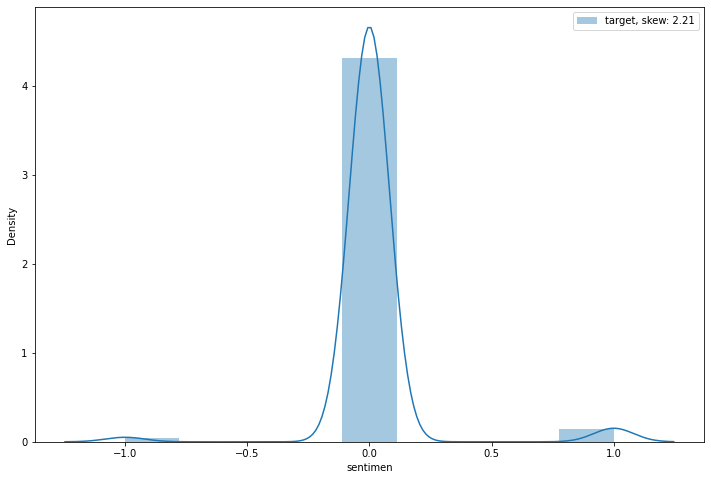

In [67]:
# Visualizing the target variable
plt.figure(figsize=(12,8))
sns.distplot(dataset_label, label=f'target, skew: {dataset_label.skew():.2f}')
plt.legend(loc='best')
plt.show()

***Kesimpulan***
Dari proses distribusi dataset yang saya gunakan, menghasilkan data sentimen dengan parameter 0 (netral) 95.8%, parameter 1 (positif) 3.1%, dan parameter -1 (negatif) 1%


## Fitur Ekstraksi Menggunakan TF-IDF

### Cek Sentimen

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [69]:
vectorizer = TfidfVectorizer()

In [70]:
X = vectorizer.fit_transform(dataset_feature)

In [71]:
print(X.shape)

(96, 748)


In [73]:
features = vectorizer.get_feature_names_out()
features

array(['aa', 'acara', 'adat', 'adil', 'afiliasi', 'aher', 'ahmad', 'air',
       'aja', 'ajar', 'akhir', 'akibat', 'akrab', 'aktif', 'alam',
       'alokasi', 'ama', 'aman', 'amat', 'amazon', 'ambil', 'amin',
       'anak', 'and', 'aneka', 'anggar', 'anggota', 'angkat', 'angkot',
       'angkut', 'anies', 'antiran', 'apa', 'aparat', 'army', 'artis',
       'asdp', 'astronaut', 'atas', 'ato', 'baca', 'bagai', 'bakal',
       'bakauheni', 'balai', 'balap', 'banget', 'bangkit', 'bangun',
       'banten', 'bantu', 'banyak', 'barat', 'baru', 'bas', 'batam',
       'batas', 'bayar', 'bayi', 'beijing', 'belah', 'belakang',
       'belanja', 'beli', 'benci', 'bend', 'besar', 'bias', 'bicara',
       'bidang', 'bikin', 'bila', 'binsar', 'biro', 'biru', 'bisa',
       'bjorka', 'bkprmi', 'blibli', 'bloc', 'bobol', 'body', 'bom', 'bp',
       'bpk', 'breakdown', 'brightening', 'budaya', 'budi', 'buk', 'buka',
       'bukan', 'buku', 'bulan', 'cakap', 'calon', 'capres', 'cara',
       'care', 'car

In [74]:
idfValues = vectorizer.idf_

In [75]:
d = dict(zip(features, 9 - idfValues))

In [76]:
sortedDict = sorted(d.items(), key = lambda d: d[1], reverse = True)

In [78]:
for i in range(200):
    print(sortedDict[i])

('user', 6.980637082986031)
('number', 6.644164846364818)
('rt', 6.4210212950506085)
('banyak', 5.9902383789581535)
('indonesia', 5.910195671284617)
('jadi', 5.727874114490663)
('kata', 5.622513598832836)
('nasional', 5.371199170551931)
('nilai', 5.371199170551931)
('tahun', 5.371199170551931)
('akhir', 5.217048490724672)
('dukung', 5.217048490724672)
('masyarakat', 5.217048490724672)
('nyata', 5.217048490724672)
('orang', 5.217048490724672)
('pribadi', 5.217048490724672)
('survei', 5.217048490724672)
('tidak', 5.217048490724672)
('wakil', 5.217048490724672)
('yg', 5.217048490724672)
('bagai', 5.034726933930718)
('dekat', 5.034726933930718)
('kamil', 5.034726933930718)
('kerja', 5.034726933930718)
('kota', 5.034726933930718)
('lalu', 5.034726933930718)
('libat', 5.034726933930718)
('musik', 5.034726933930718)
('paling', 5.034726933930718)
('pilih', 5.034726933930718)
('responden', 5.034726933930718)
('ridwan', 5.034726933930718)
('sed', 5.034726933930718)
('sisa', 5.034726933930718)
('

In [79]:
positive_low_reviews = dataset[(dataset["sentimen"] == 1)]
negative_low_reviews = dataset[(dataset["sentimen"] == -1)]
neutral_reviews = dataset[(dataset["sentimen"] == 0)]
positive_high_reviews = dataset[(dataset["sentimen"] == 2)]
negative_high_reviews = dataset[(dataset["sentimen"] == -2)]

In [80]:
## Melakukan install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plot

In [81]:
def PlotWordCloud(frequency):
    worcloudPlot = WordCloud(background_color="white", width=1500, height=1000)
    worcloudPlot.generate_from_frequencies(frequencies=frequency)
    plot.figure(figsize=(15,10))
    plot.imshow(worcloudPlot, interpolation="bilinear")
    plot.axis("off")
    plot.show()

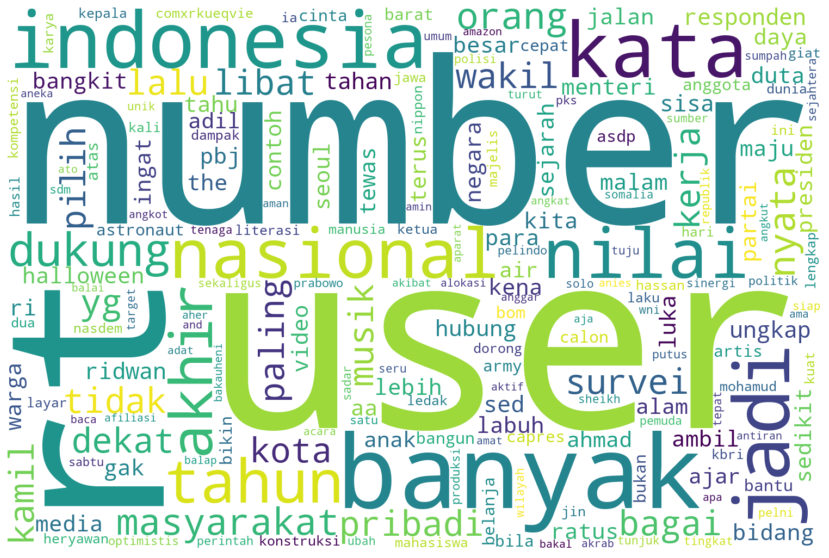

In [82]:
PlotWordCloud(d)

## Cek sentimen untuk Semua label

**jangan lupa, gunakan semua data, maka yang dilakukan adalah mengolah data `df_new["sentimen"]`**

In [83]:
tfidf_vect = TfidfVectorizer(ngram_range = (1,2))

In [84]:
Data_TFIDF = tfidf_vect.fit_transform(df_new["ProcessedText"].values)

In [85]:
Data_TFIDF.shape

(96, 1676)

## Training dan Testing dibagi menjadi 70 - 30
70 untuk data training, dan 30 untuk data testing

In [86]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split

In [87]:
train_x, test_x, train_label, test_label = train_test_split(dataset_feature, dataset_label, test_size = 0.3, random_state=42)

In [89]:
test_x

80    kini tengah maki ujar benci tebar memang layak...
77    rt user rp number kalo dipake bikin lrt dpt nu...
73    seluruh masyarakat indonesia ucap selamat inga...
94    tahu pssi putus cepat laksana klb gelar rapat ...
33    tinggi jumlah serta kompetisi bidang khusus wa...
79    media indonesia bicara unggul unitsky string t...
69    malam halloween kemarin lebih tepat hari sabtu...
42    turut anggota urus aman rupa anak adat bagai w...
0     user wah cocok ne gw dukung number menang bala...
10    wakil ketua majelis syuro partai adil sejahter...
64    konser musik dendang goyang istora senayan sab...
30    luhut binsar pandjaitan yakin ekonomi indonesi...
18    presiden somalia hassan sheikh mohamud kata se...
4     informasi mandatory serum infused brightening ...
31    banyak literasi lah sulit kalau jadi anggota p...
26                 user kali bantu breakdown rinciannya
12    wakil ketua majelis syura partai adil sejahter...
22    rawan puan sebar ratus paket sembako masya

## Model - Naive Bayes

In [92]:
from sklearn.naive_bayes import MultinomialNB

In [93]:
from sklearn.pipeline import Pipeline
classifier_nb = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('model', MultinomialNB()),
])

In [94]:
parameters_nb = {
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3), (1, 4)],
    'model__alpha': (0.0001, 0.001, 0.1, 1, 10, 100)
}

In [95]:
classifier_nb = GridSearchCV(classifier_nb, parameters_nb, cv = 3, n_jobs=-1)

In [96]:
classifier_nb.fit(train_x, train_label.ravel())

/Users/faradilazahrotunnisa/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('model', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'model__alpha': (0.0001, 0.001, 0.1, 1, 10, 100),
                         'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3),
                                                (1, 4)]})

## Nilai Accuracy Training Set dan Testing Set


In [97]:
y_pred_nb_train = classifier_nb.predict(train_x)
accuracy_nb_train = accuracy_score(train_label, y_pred_nb_train)
print("Accuracy Training set: ", accuracy_nb_train)

y_pred_nb_test = classifier_nb.predict(test_x)
accuracy_nb_test = accuracy_score(test_label, y_pred_nb_test)
print("Accuracy Test set: ", accuracy_nb_test)

Accuracy Training set:  1.0
Accuracy Test set:  1.0


## Nilai Recall Training Set dan Testing Set


In [98]:
recall_nb_train = recall_score(train_label, y_pred_nb_train, average='weighted')
print("Recall Training set: ", recall_nb_train)

recall_nb_test = recall_score(test_label, y_pred_nb_test, average='weighted')
print("Recall Test set: ", recall_nb_test)

Recall Training set:  1.0
Recall Test set:  1.0


## Nilai Precision Training Set dan Testing Set


In [99]:
precision_nb_train = precision_score(train_label, y_pred_nb_train, average='weighted')
print("Precision Training set: ", precision_nb_train)

precision_nb_test = precision_score(test_label, y_pred_nb_test, average='weighted')
print("Precision Test set: ", precision_nb_test)

Precision Training set:  1.0
Precision Test set:  1.0


## Nilai F1 Training Set dan Testing Set

In [100]:
f1_nb_train = f1_score(train_label, y_pred_nb_train, average='weighted')
print("F1 Training set: ", f1_nb_train)

f1_nb_test = f1_score(test_label, y_pred_nb_test, average='weighted')
print("F1 Test set: ", f1_nb_test)

F1 Training set:  1.0
F1 Test set:  1.0


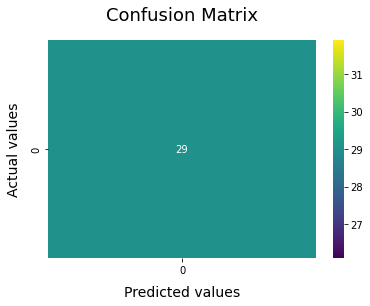

In [101]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(test_label, y_pred_nb_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
plt.show()

In [102]:
classifier_nb.best_estimator_

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('model', MultinomialNB(alpha=0.0001))])

In [103]:
for param_name in sorted(parameters_nb.keys()):
    print("%s: %r" % (param_name, classifier_nb.best_params_[param_name]))

model__alpha: 0.0001
tfidf__ngram_range: (1, 1)


# Visualisasi

In [104]:
models = [        
          ('Naive Bayes Multinomial', accuracy_nb_train, accuracy_nb_test),
         ]

In [105]:
predict = pd.DataFrame(data = models, columns=['Model', 'Training Accuracy', 'Test Accuracy'])
predict

,Model,Training Accuracy,Test Accuracy
0,Naive Bayes Multinomial,1.0,1.0


In [106]:
models_comparison = [                        
                        ('Naive Bayes Multinomial', accuracy_nb_test, recall_nb_test, precision_nb_test, f1_nb_test)                      
                    ]

In [107]:
comparison = pd.DataFrame(data = models_comparison, columns=['Model', 'Accuracy', 'Recall', 'Precision', 'F1 Weighted'])
comparison

,Model,Accuracy,Recall,Precision,F1 Weighted
0,Naive Bayes Multinomial,1.0,1.0,1.0,1.0


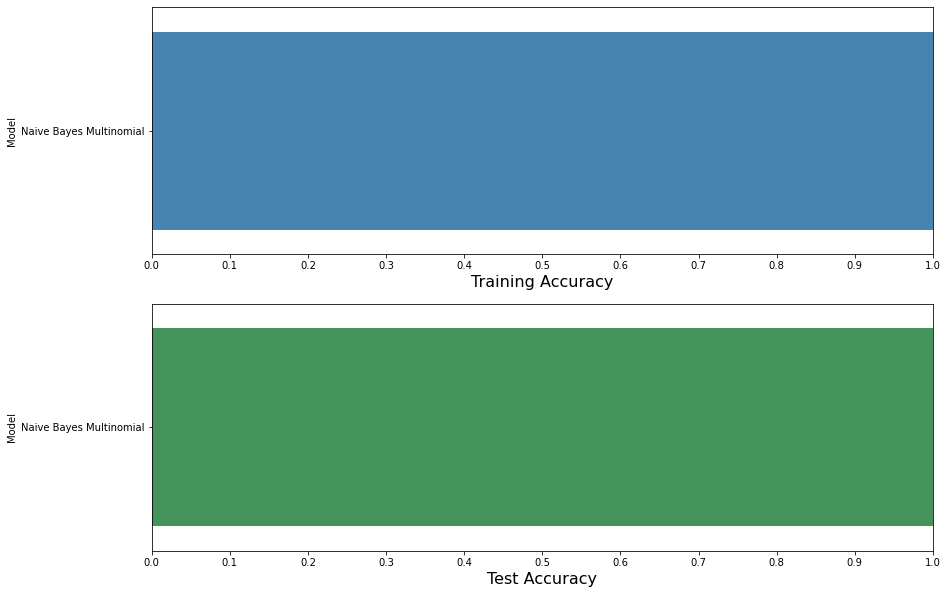

In [108]:
import numpy as np

f, axes = plt.subplots(2,1, figsize=(14,10))

predict.sort_values(by=['Training Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Training Accuracy', y='Model', data = predict, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('Training Accuracy', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

predict.sort_values(by=['Test Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Test Accuracy', y='Model', data = predict, palette='Greens_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('Test Accuracy', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

# Kesimpulan:

- Nilai data training dan testing memiliki akurasi yang tinggi dimana nilai akurasi data training dan testing sama-sama bernilai akurasi 1.0 . Data ini di dapatkan dari hasil pengujian menggunakan stemming dan stopword
